## FOR THIS DATA SET WE USED THE WEBSITE https://www.payscale.com/college-salary-report/bachelors/page/{page_number}

In [1]:
# import pandas as pdimport requests  
# from bs4 import BeautifulSoup  
# import pandas as pd  
  
# def scrape_page(page_number):  
#     url = f"https://www.payscale.com/college-salary-report/bachelors/page/{page_number}"  
#     response = requests.get(url)  
#     soup = BeautifulSoup(response.text, 'html.parser')  
#     table_rows = soup.select('table.data-table tbody tr')  
      
#     data = []  
#     for row in table_rows:  
#         cells = row.select('td')  
#         if len(cells) >= 6:  
#             rank = cells[0].get_text(strip=True)  
#             school_name = cells[1].get_text(strip=True)  
#             school_type = cells[2].get_text(strip=True)  
#             early_career_pay = cells[3].get_text(strip=True)  
#             mid_career_pay = cells[4].get_text(strip=True)  
#             high_meaning = cells[5].get_text(strip=True) if len(cells) > 5 else "N/A"  
#             stem_degrees = cells[6].get_text(strip=True) if len(cells) > 6 else "N/A"  
              
#             data.append({  
#                 'Rank': rank,  
#                 'School Name': school_name,  
#                 'School Type': school_type,  
#                 'Early Career Pay': early_career_pay,  
#                 'Mid-Career Pay': mid_career_pay,  
#                 'High Meaning %': high_meaning,  
#                 'STEM Degrees %': stem_degrees  
#             })  
      
#     return pd.DataFrame(data)  
  
# num_pages = 61  
# all_data = pd.DataFrame()  
  
# for page in range(1, num_pages + 1):  
#     df_page = scrape_page(page)  
#     all_data = pd.concat([all_data, df_page], ignore_index=True)  
  
# all_data.to_csv("complete university salary data.csv", index=False)  
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

## THE CODE ABOVE WAS USED FOR SCRAPPING THE DATA SET, IT WAS DONE ON A SEPARATE FILE SO IT IS JUST SHOWN HERE FOR REFERENCE

## MOVING FORWARD, WE WILL USE THE SCRAPED CSV FILE TO ANALYZE
## THIS DATA WAS FOUND THROUGH RESEARCH ON GOOGLE SINCE WE FAILED TO DRAW ANY CONLCUSION FROM THE PREVIOUS DATA SET

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\rezwa


In [130]:
df = pd.read_csv('complete_university_salary_data (1).csv')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              1477 non-null   int64 
 1   School Name       1477 non-null   object
 2   School Type       1477 non-null   object
 3   Early Career Pay  1477 non-null   int64 
 4   Mid-Career Pay    1477 non-null   int64 
 5   % High Meaning    1477 non-null   object
 6   % STEM Degrees    1477 non-null   int64 
 7   Source            1477 non-null   object
dtypes: int64(4), object(4)
memory usage: 92.4+ KB


In [132]:
df = df.dropna()
df= df.drop_duplicates()
df=df.drop(['Source'],axis=1)

In [133]:
df.head()

,Rank,School Name,School Type,Early Career Pay,Mid-Career Pay,% High Meaning,% STEM Degrees
0,1,Massachusetts Institute of Technology,"Engineering, Private School, Research University",110200,196900,49,66
1,2,Princeton University,"Engineering, Ivy League, Private School, Resea...",95600,194100,51,53
2,3,United States Naval Academy,"Engineering, Liberal Arts School, Sober School...",96700,187800,53,54
3,4,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",115000,185900,61,74
4,5,Babson College,"Business, Private School",90600,181400,48,3


In [134]:
print(df.columns.tolist())

['Rank', 'School Name', 'School Type', 'Early Career Pay', 'Mid-Career Pay', '% High Meaning', '% STEM Degrees']


### The column High Meaning signifies the number of people who thinks that their work makes the world a better place.

In [135]:
df = df.rename(columns={'% High Meaning': 'Alumni_Work_Impact %'})

In [136]:
df.head()

,Rank,School Name,School Type,Early Career Pay,Mid-Career Pay,Alumni_Work_Impact %,% STEM Degrees
0,1,Massachusetts Institute of Technology,"Engineering, Private School, Research University",110200,196900,49,66
1,2,Princeton University,"Engineering, Ivy League, Private School, Resea...",95600,194100,51,53
2,3,United States Naval Academy,"Engineering, Liberal Arts School, Sober School...",96700,187800,53,54
3,4,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",115000,185900,61,74
4,5,Babson College,"Business, Private School",90600,181400,48,3


In [137]:
print(df.columns.tolist())

['Rank', 'School Name', 'School Type', 'Early Career Pay', 'Mid-Career Pay', 'Alumni_Work_Impact %', '% STEM Degrees']


### Lets do some basic analysis before diving any further, at first I want to take a look how does university ranking play a role in early career pay.

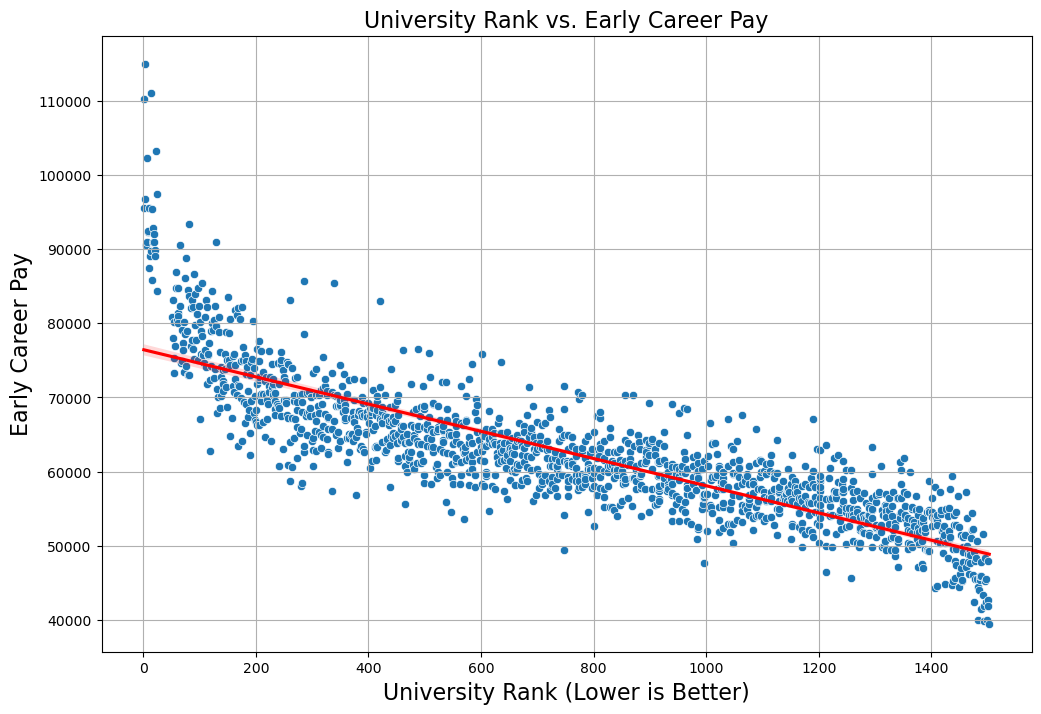

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Rank', y='Early Career Pay')
sns.regplot(data=df, x='Rank', y='Early Career Pay', scatter=False, color='red')
plt.title('University Rank vs. Early Career Pay',fontsize=16)
plt.xlabel('University Rank (Lower is Better)',fontsize=16)
plt.ylabel('Early Career Pay',fontsize=16)
plt.grid()
plt.show()

### The lower the number the better, this clearly shows what we would expect and the data is not strange like it was in our previous analysis. 
### The lower the rank, meaning the more prestigious it is, the higher chance they have of having a better starting salary than other universities. But why is that the case?
### What does these universities have that lower ranked universities don't, does major play a role?
### The red regression line is strong and well-fitted

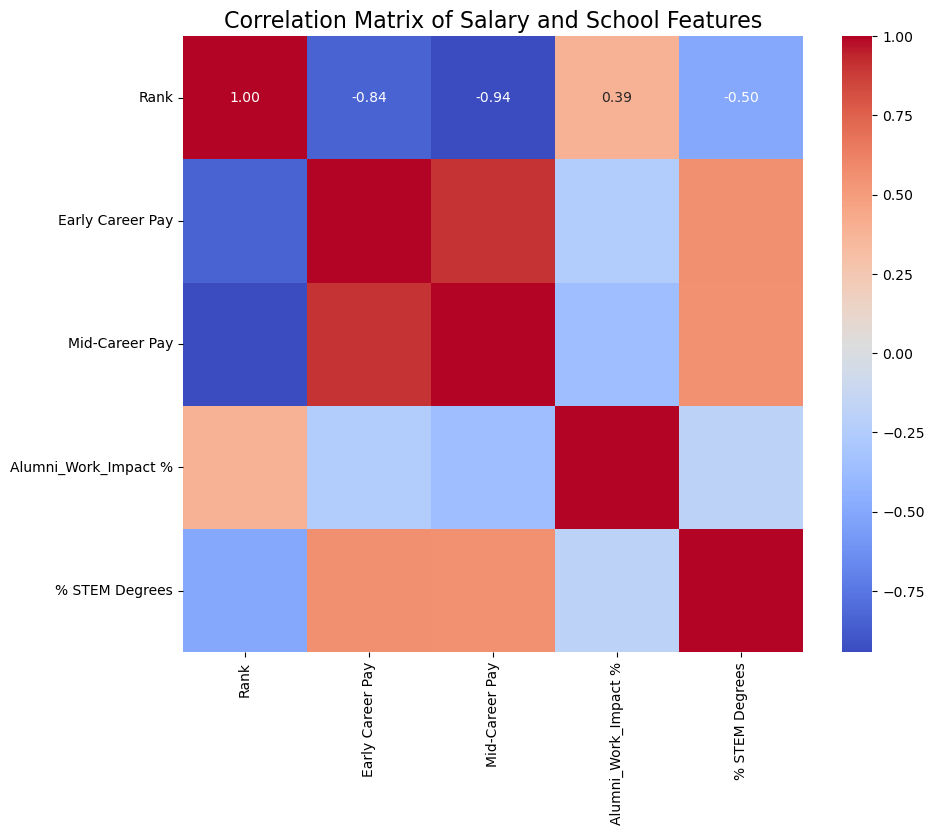

In [159]:
df['Alumni_Work_Impact %'] = pd.to_numeric(df['Alumni_Work_Impact %'], errors='coerce')
df['% STEM Degrees'] = pd.to_numeric(df['% STEM Degrees'], errors='coerce')
plt.figure(figsize=(10, 8))
corr_matrix = df[['Rank', 'Early Career Pay', 'Mid-Career Pay', 'Alumni_Work_Impact %', '% STEM Degrees']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Salary and School Features',fontsize=16)
plt.show()

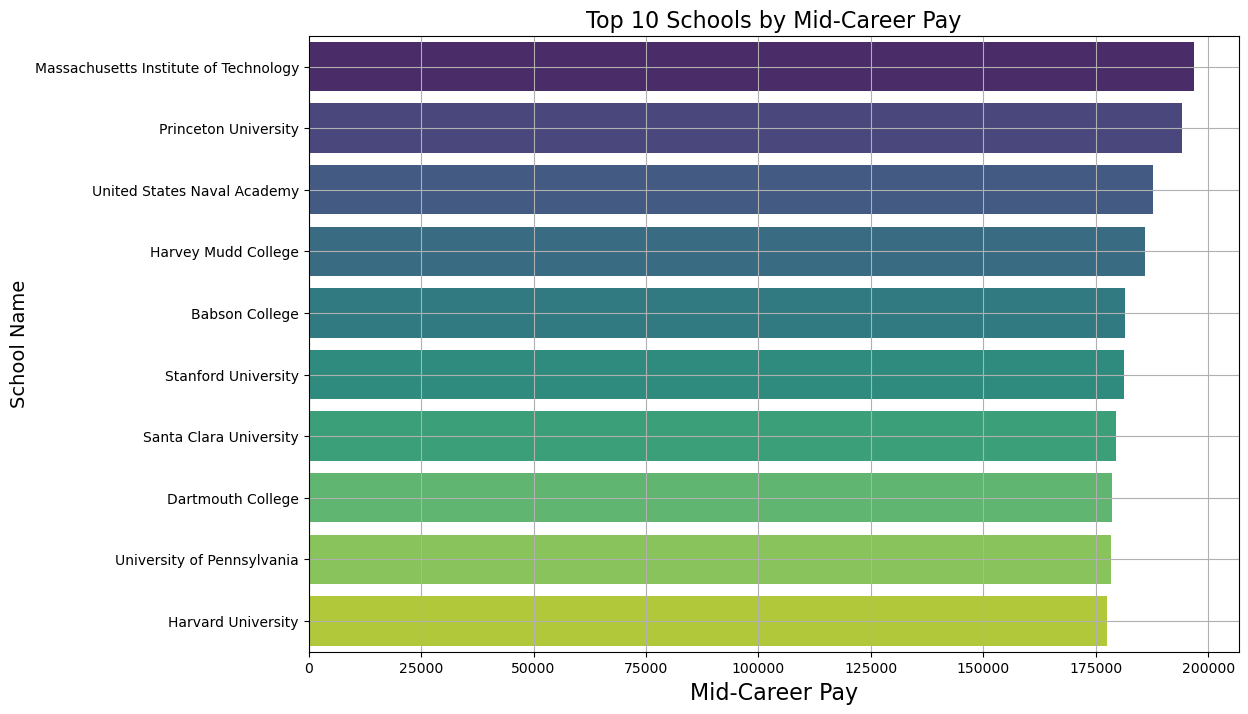

In [160]:
top10 = df.sort_values(by='Mid-Career Pay', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top10, y='School Name', x='Mid-Career Pay', palette='viridis')
plt.title('Top 10 Schools by Mid-Career Pay',fontsize=16)
plt.xlabel('Mid-Career Pay',fontsize=16)
plt.ylabel('School Name',fontsize=14)
plt.grid()
plt.show()

### Not that insightful, just shows that top 10 has similar salary range
### There’s a ceiling effect, elite schools all deliver similarly high outcomes by mid-career.

### Prestige seems to have diminishing returns once you hit the top tier

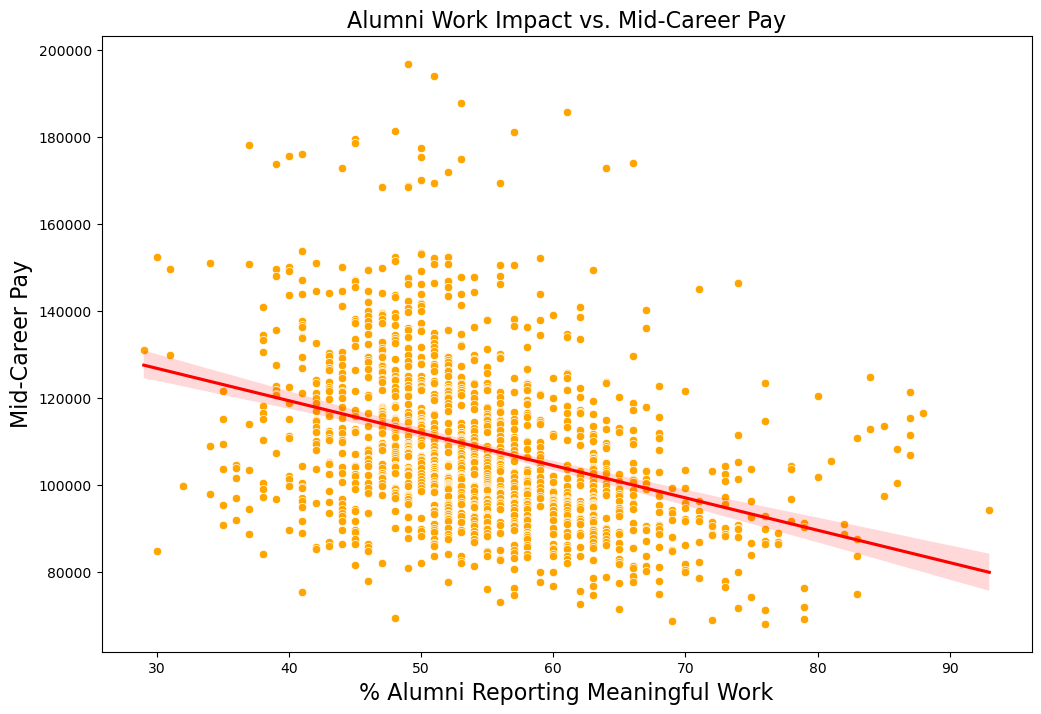

In [155]:
df['Alumni_Work_Impact %'] = pd.to_numeric(df['Alumni_Work_Impact %'], errors='coerce') #errors using datatype

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Alumni_Work_Impact %', y='Mid-Career Pay', color='orange')
sns.regplot(data=df, x='Alumni_Work_Impact %', y='Mid-Career Pay', scatter=False, color='red')
plt.title('Alumni Work Impact vs. Mid-Career Pay',fontsize=16)
plt.xlabel('% Alumni Reporting Meaningful Work',fontsize=16)
plt.ylabel('Mid-Career Pay',fontsize=16)
plt.show()

## This chart introduces a purpose vs. pay dynamic.

## Schools that produce high-paying alumni often don’t produce the ones who say they’re making a difference in the world.

## This adds a human/ethical dimension to your story that contrasts pure salary data

## Probably one of the most important charts we analyzed.

## Doesn’t explain why that trade-off exists. (MUST DIVE DEEPER)

C:\Users\rezwa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


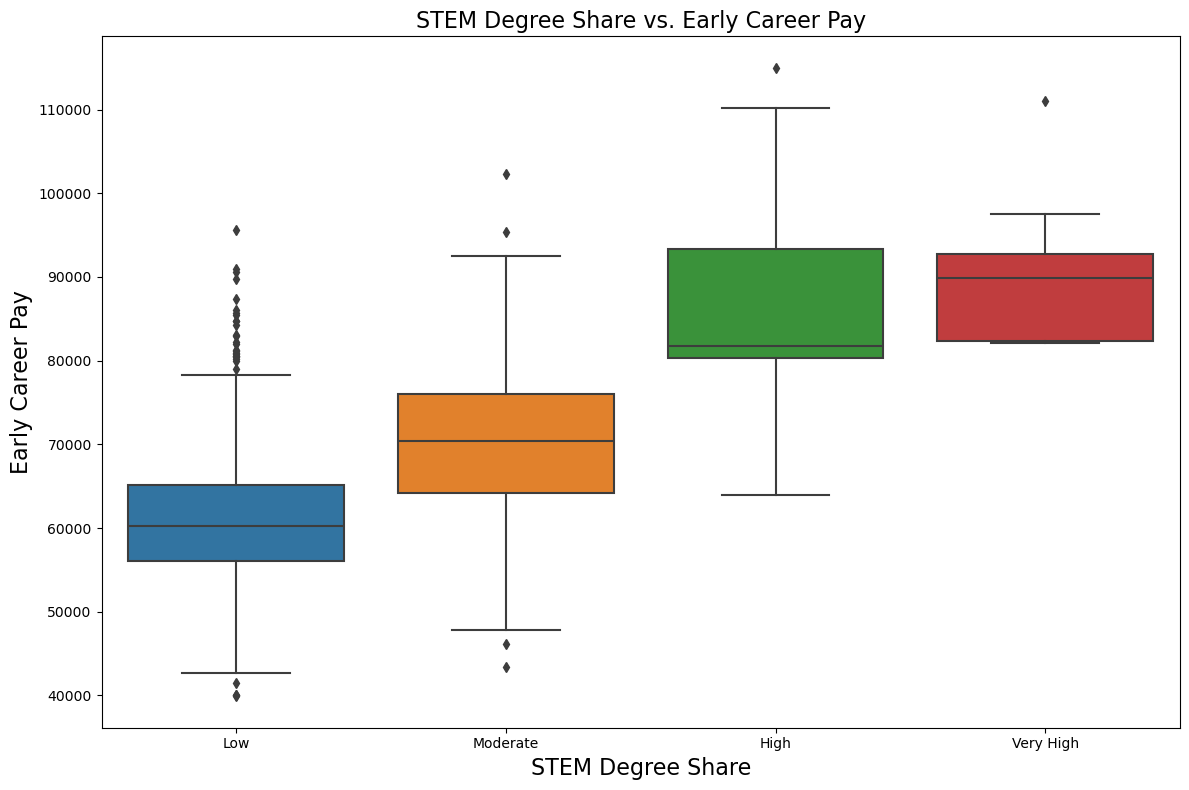

In [144]:
df['STEM_Level'] = pd.cut(df['% STEM Degrees'], bins=[0, 25, 50, 75, 100],labels=['Low', 'Moderate', 'High', 'Very High'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='STEM_Level', y='Early Career Pay')
plt.title('STEM Degree Share vs. Early Career Pay',fontsize=16)
plt.xlabel('STEM Degree Share',fontsize=16)
plt.ylabel('Early Career Pay',fontsize=16)
plt.tight_layout()
plt.show()

### Clear upward trend: as the percentage of STEM degrees increases, early career pay goes up.

### Very High STEM schools (75–100%) consistently offer the highest median and tightest salary range

### This shows that STEM focus is a major factor in boosting early career salary, even beyond rank.

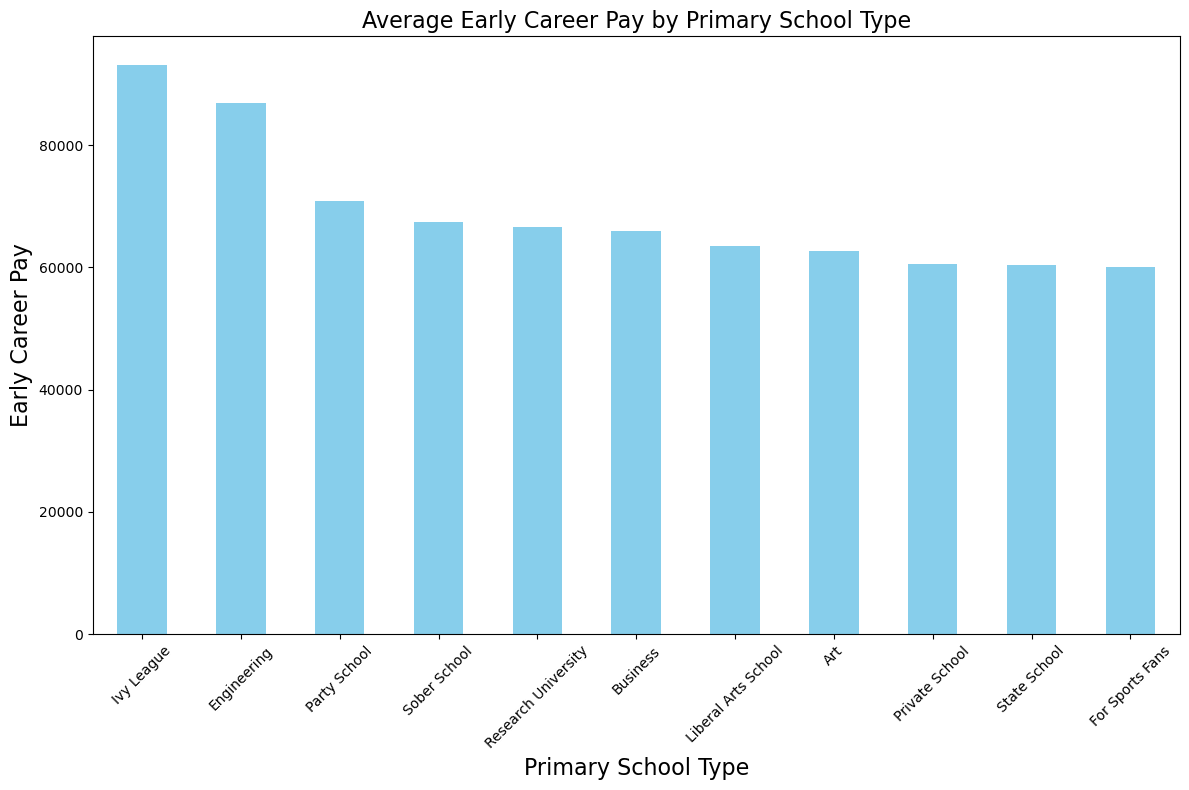

In [147]:
df['Primary_Type'] = df['School Type'].str.split(',').str[0]

# Group by primary type
type_salary = df.groupby('Primary_Type')['Early Career Pay'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
type_salary.plot(kind='bar', color='skyblue')
plt.title('Average Early Career Pay by Primary School Type',fontsize=16)
plt.ylabel('Early Career Pay',fontsize=16)
plt.xlabel('Primary School Type',fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ivy League and Engineering schools top the list by a wide margin.

### More generic or niche types like Party School, Sober School, and For Sports Fans fall lower.

### The difference between top and bottom types is $30K+, which is significant

C:\Users\rezwa\AppData\Local\Temp\ipykernel_26728\2454680010.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_tier = df.groupby('Rank_Tier')[['Early Career Pay', 'Mid-Career Pay']].mean().round(0)
C:\Users\rezwa\AppData\Local\Temp\ipykernel_26728\2454680010.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, salary_by_tier['Early Career Pay'][i] + 1000, f"${salary_by_tier['Early Career Pay'][i]:,.0f}",
C:\Users\rezwa\AppData\Local\Temp\ipykernel_26728\2454680010.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alway

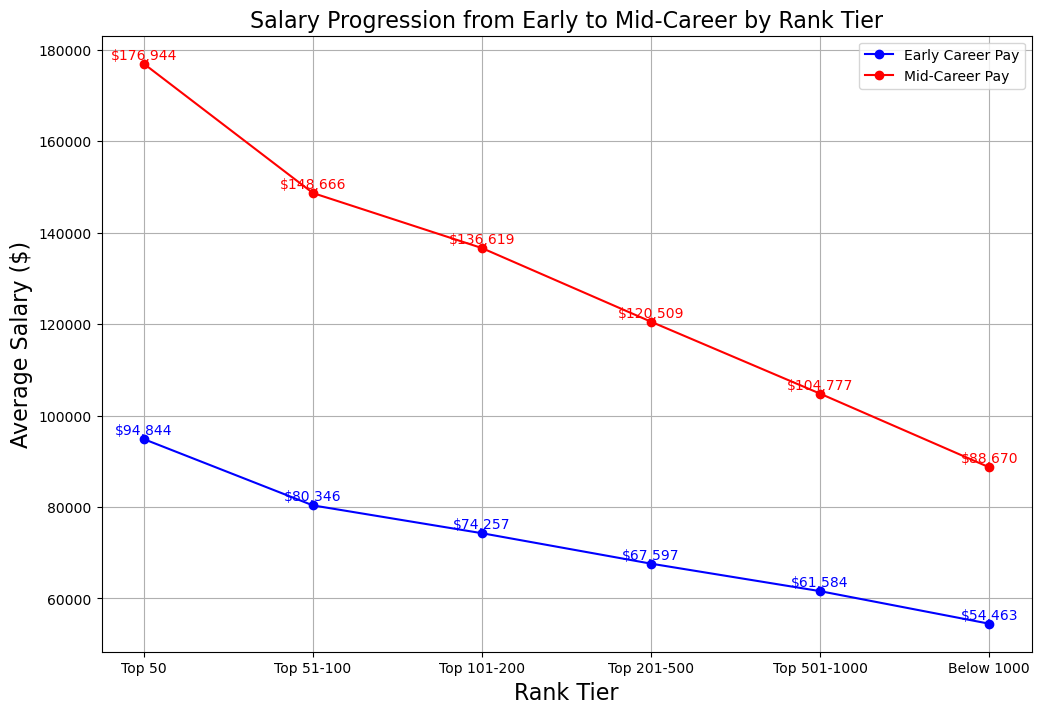

In [150]:
bins = [0, 50, 100, 200, 500, 1000, df['Rank'].max()]
labels = ['Top 50', 'Top 51-100', 'Top 101-200', 'Top 201-500', 'Top 501-1000', 'Below 1000']
df['Rank_Tier'] = pd.cut(df['Rank'], bins=bins, labels=labels, right=True)

# getting the average salaries in their each respective tier
salary_by_tier = df.groupby('Rank_Tier')[['Early Career Pay', 'Mid-Career Pay']].mean().round(0)

plt.figure(figsize=(12, 8))
plt.plot(salary_by_tier.index, salary_by_tier['Early Career Pay'], marker='o', color='blue', label='Early Career Pay')
plt.plot(salary_by_tier.index, salary_by_tier['Mid-Career Pay'], marker='o', color='red', label='Mid-Career Pay')

# Annotating the values for better visual
for i, tier in enumerate(salary_by_tier.index):
    plt.text(i, salary_by_tier['Early Career Pay'][i] + 1000, f"${salary_by_tier['Early Career Pay'][i]:,.0f}", 
             ha='center', color='blue')
    plt.text(i, salary_by_tier['Mid-Career Pay'][i] + 1000, f"${salary_by_tier['Mid-Career Pay'][i]:,.0f}", 
             ha='center', color='red')

plt.title('Salary Progression from Early to Mid-Career by Rank Tier',fontsize=16)
plt.xlabel('Rank Tier',fontsize=16)
plt.ylabel('Average Salary ($)',fontsize=16)
plt.legend()
plt.grid()
plt.show()

### Both early and mid-career salaries drop sharply as school rank worsens.

### The gap between early and mid-career pay grows over time — especially for top-ranked schools.

### This is a direct and powerful confirmation of our hypothesis

### “Higher-ranked schools lead to higher starting salaries and even greater long-term payoff.”

### It adds time perspective (much needed) the advantage of attending a top school increases over your career, not just at entry.

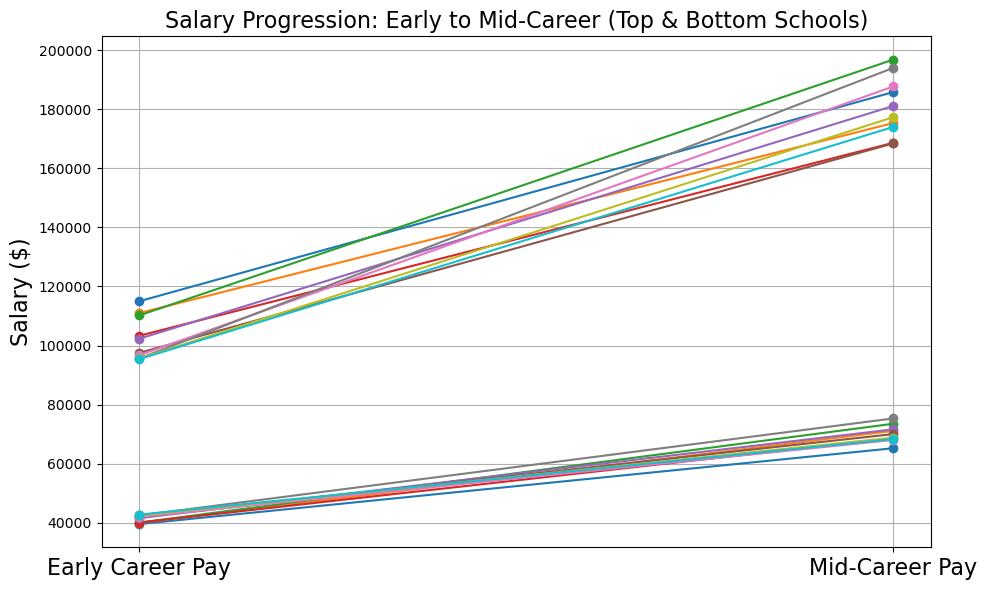

In [154]:
top10 = df.nlargest(10, 'Early Career Pay')
bottom10 = df.nsmallest(10, 'Early Career Pay')
slope_df = pd.concat([top10, bottom10])

slope_melted = slope_df.melt(id_vars='School Name', value_vars=['Early Career Pay', 'Mid-Career Pay'])

plt.figure(figsize=(10, 6))
for school in slope_melted['School Name'].unique():
    data = slope_melted[slope_melted['School Name'] == school]
    plt.plot(data['variable'], data['value'], marker='o', label=school)

plt.title('Salary Progression: Early to Mid-Career (Top & Bottom Schools)',fontsize=16)
plt.ylabel('Salary ($)',fontsize=16)
plt.xticks(['Early Career Pay', 'Mid-Career Pay'],fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# Probably not going to use this, but this will be useful later.
# FINAL CONCLUSIONS
# Higher-ranked schools lead to better early and mid-career pay.

# The salary gap widens over time, meaning top-tier degrees yield better long-term returns.

# STEM-focused institutions further enhance early salary, indicating career path matters too.

# Higher salary ≠ greater satisfaction in fact, alumni who say their work is meaningful tend to earn less
# This suggests a trade-off between purpose and pay
# To build a fuller picture of career outcomes, we’d need datasets that include:

# --Job roles or industries

# --Geographic impact (cost of living differences)

# --Job level or promotion rate

# --Personal well-being, work-life balance, or fulfillment scores

# Rank matters. STEM helps. But values, purpose, and career fit may matter just as much

In [61]:
df.to_excel('CLEAN DATA SET 2.xlsx', index=False)